In [151]:
import pandas as pd

In [152]:
df = pd.read_excel(r"C:\Users\LOAN PROCESSING\loan-data - Processed - loan-data - Processed (1).xlsx")

In [153]:
df.head(5)

,customer_id,disbursed_amount,interest,market,employment,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,RENT,84600.0,2013-06-11,0,Debt consolidation,4,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,OWNER,102000.0,2014-05-08,0,Car purchase,13,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,RENT,69840.0,2013-10-26,0,Debt consolidation,8,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,RENT,100386.0,2015-08-20,0,Debt consolidation,20,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,RENT,95040.0,2014-07-22,0,Debt consolidation,14,2016-01-11,NaN


In [154]:
df.columns

Index(['customer_id', 'disbursed_amount', 'interest', 'market', 'employment',
       'householder', 'income', 'date_issued', 'target', 'loan_purpose',
       'number_open_accounts', 'date_last_payment', 'number_credit_lines_12'],
      dtype='object')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             9998 non-null   int64         
 1   disbursed_amount        9981 non-null   float64       
 2   interest                9982 non-null   float64       
 3   market                  9998 non-null   object        
 4   employment              9388 non-null   object        
 5   householder             9998 non-null   object        
 6   income                  9998 non-null   float64       
 7   date_issued             9998 non-null   datetime64[ns]
 8   target                  9998 non-null   int64         
 9   loan_purpose            9998 non-null   object        
 10  number_open_accounts    9998 non-null   int64         
 11  date_last_payment       9998 non-null   datetime64[ns]
 12  number_credit_lines_12  238 non-null    float64 

In [156]:
df.shape

(9998, 13)

In [157]:
df.isnull().sum()

customer_id                  0
disbursed_amount            17
interest                    16
market                       0
employment                 610
householder                  0
income                       0
date_issued                  0
target                       0
loan_purpose                 0
number_open_accounts         0
date_last_payment            0
number_credit_lines_12    9760
dtype: int64

In [158]:
import missingno as msno

<Axes: >

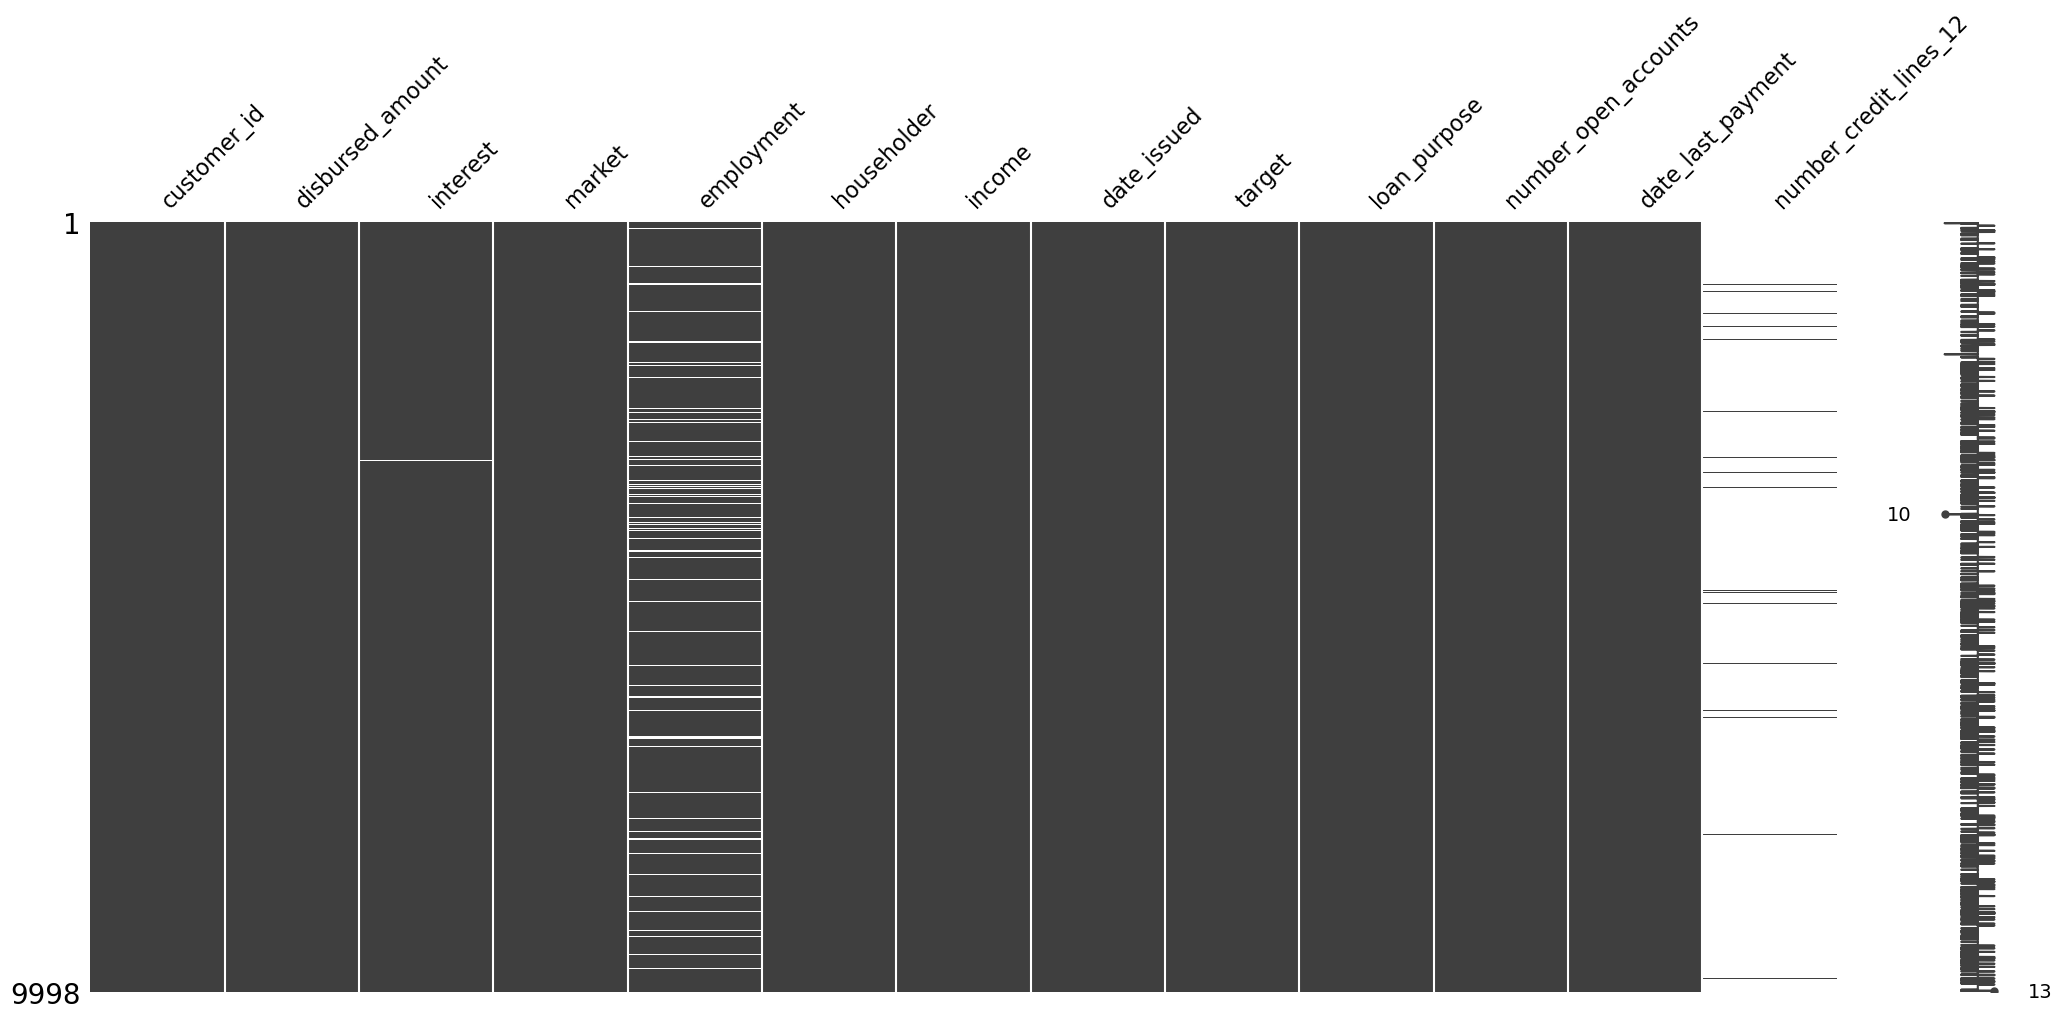

In [159]:
msno.matrix(df)

In [160]:
df=df.drop(columns=["customer_id"])

In [161]:
df.shape

(9998, 12)

In [162]:
df.isnull().sum()

disbursed_amount            17
interest                    16
market                       0
employment                 610
householder                  0
income                       0
date_issued                  0
target                       0
loan_purpose                 0
number_open_accounts         0
date_last_payment            0
number_credit_lines_12    9760
dtype: int64

In [163]:
df = df.drop(columns=["number_credit_lines_12"])

In [164]:
df.shape

(9998, 11)

In [165]:
from sklearn.impute import KNNImputer
knnimput = KNNImputer()
knnimput.fit(df[["disbursed_amount"]])
df["disbursed_amount"]= knnimput.transform(df[["disbursed_amount"]])
knnimput.fit(df[["interest"]])
df["interest"]= knnimput.transform(df[["interest"]])

In [166]:
df.select_dtypes(include=["object"]).columns

Index(['market', 'employment', 'householder', 'loan_purpose'], dtype='object')

In [167]:
pd.to_datetime(df["date_issued"]).dt.year
pd.to_datetime(df["date_issued"]).dt.month
pd.to_datetime(df["date_issued"]).dt.day
pd.to_datetime(df["date_last_payment"]).dt.year
pd.to_datetime(df["date_issued"]).dt.month
pd.to_datetime(df["date_issued"]).dt.day
df = df.drop(columns=["date_issued"])
df = df.drop(columns=["date_last_payment"])

In [168]:
df.head(5)

,disbursed_amount,interest,market,employment,householder,income,target,loan_purpose,number_open_accounts
0,23201.5,15.4840,C,Teacher,RENT,84600.0,0,Debt consolidation,4
1,7425.0,11.2032,B,Accountant,OWNER,102000.0,0,Car purchase,13
2,11150.0,8.5100,A,Statistician,RENT,69840.0,0,Debt consolidation,8
3,7600.0,5.8656,A,Other,RENT,100386.0,0,Debt consolidation,20
4,31960.0,18.7392,E,Bus driver,RENT,95040.0,0,Debt consolidation,14


In [169]:
df.shape

(9998, 9)

In [170]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(df[["disbursed_amount"]])
df["disbursed_amount"]= minmax.transform(df[["disbursed_amount"]])
minmax.fit(df[["interest"]])
df["interest"]= minmax.transform(df[["interest"]])


In [171]:
number_columns = df.select_dtypes(include=["number"]).columns

In [172]:
for i in number_columns:
    minmax.fit(df[[i]])
    df[i]= minmax.transform(df[[i]])

In [173]:
df.head(5)

,disbursed_amount,interest,market,employment,householder,income,target,loan_purpose,number_open_accounts
0,0.653901,0.461951,C,Teacher,RENT,0.038719,0.0,Debt consolidation,0.062500
1,0.191112,0.276143,B,Accountant,OWNER,0.046682,0.0,Car purchase,0.250000
2,0.300381,0.159244,A,Statistician,RENT,0.031963,0.0,Debt consolidation,0.145833
3,0.196245,0.044464,A,Other,RENT,0.045943,0.0,Debt consolidation,0.395833
4,0.910824,0.603243,E,Bus driver,RENT,0.043497,0.0,Debt consolidation,0.270833


In [174]:
df.select_dtypes(include=['object']).columns

Index(['market', 'employment', 'householder', 'loan_purpose'], dtype='object')

In [175]:
dfm = pd.get_dummies(df["market"]).astype(int)
df = pd.concat([df, dfm], axis='columns')
df = df.drop(columns=["market"])
dfe = pd.get_dummies(df["employment"]).astype(int)
df = pd.concat([df, dfe], axis='columns')
df = df.drop(columns=["employment"])
dfh = pd.get_dummies(df["householder"]).astype(int)
df = pd.concat([df, dfh], axis='columns')
df = df.drop(columns=["householder"])
dfl = pd.get_dummies(df["loan_purpose"]).astype(int)
df = pd.concat([df, dfl], axis='columns')
df = df.drop(columns=["loan_purpose"])

In [176]:
df.head(5)

,disbursed_amount,interest,income,target,number_open_accounts,A,B,C,D,E,...,OWNER,RENT,Car purchase,Debt consolidation,Health,Holidays,Home improvements,Moving home,Other,Wedding
0,0.653901,0.461951,0.038719,0.0,0.062500,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0.191112,0.276143,0.046682,0.0,0.250000,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,0.300381,0.159244,0.031963,0.0,0.145833,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0.196245,0.044464,0.045943,0.0,0.395833,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0.910824,0.603243,0.043497,0.0,0.270833,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [177]:
X = df.drop(columns=['target'])
y = df['target']

In [178]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smote.fit_resample(X, y)
X,y = smote.fit_resample(X, y)

In [179]:
y.value_counts()

target
0.0    9881
1.0    9881
Name: count, dtype: int64

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)


In [181]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("Accuracy:", lrm.score(X_test, y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      7948
         1.0       0.94      0.89      0.91      7862

    accuracy                           0.92     15810
   macro avg       0.92      0.92      0.92     15810
weighted avg       0.92      0.92      0.92     15810

Accuracy: 0.9177103099304238


In [182]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("Accuracy:", dtc.score(X_test, y_test))


              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      7948
         1.0       0.90      0.94      0.92      7862

    accuracy                           0.92     15810
   macro avg       0.92      0.92      0.92     15810
weighted avg       0.92      0.92      0.92     15810

Accuracy: 0.9179633143580013


In [183]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))
print("Accuracy:", knn.score(X_test, y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      7948
         1.0       0.86      0.99      0.92      7862

    accuracy                           0.91     15810
   macro avg       0.92      0.92      0.91     15810
weighted avg       0.92      0.91      0.91     15810

Accuracy: 0.9147375079063884


In [187]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print ("Accuracy:", svc.score(X_test, y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      7948
         1.0       0.92      0.94      0.93      7862

    accuracy                           0.93     15810
   macro avg       0.93      0.93      0.93     15810
weighted avg       0.93      0.93      0.93     15810

Accuracy: 0.9312460468058191


In [185]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("Accuracy:", rfc.score(X_test, y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      7948
         1.0       0.96      0.98      0.97      7862

    accuracy                           0.97     15810
   macro avg       0.97      0.97      0.97     15810
weighted avg       0.97      0.97      0.97     15810

Accuracy: 0.9717900063251107


In [189]:
#best model is RandomForestClassifier with accuracy 0.98

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 31 artists>

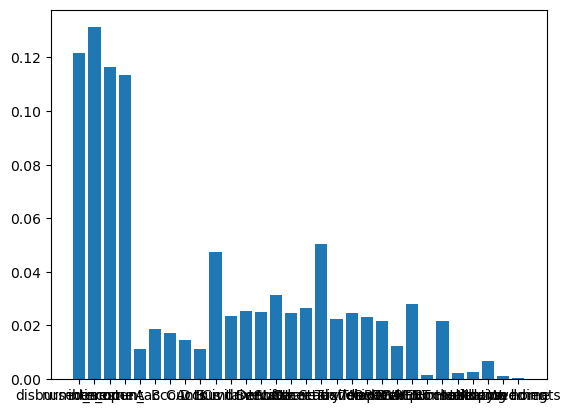

In [195]:
plt.bar(X.columns, rfc.feature_importances_)

In [1]:
import streamlit as st

In [4]:
import streamlit as st

with open("loan_approval_model.pkl", "rb") as file:
    st.download_button(
        label="Download Loan Approval Model",
        data=file,
        file_name="loan_approval_model.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'loan_approval_model.pkl'